In [1]:
import pandas as pd
from itertools import product

# Configuration options
testbeds = ["2xL", "2xR", "1L1R"]
security_levels = [80, 112, 128]
mt_algos = ["OT", "Paillier", "DGK"]
bit_lengths = ["64bit", "32bit"]
networks = ["Wireless", "Wired"]

# Generate all permutations
permutations = list(product(testbeds, security_levels, mt_algos, bit_lengths, networks))

# Create empty sets with descriptive names for each permutation
sets = {}

for perm in permutations:
    # Generate a descriptive name based on the permutation
    name = f"{perm[0]}_{perm[1]}_{perm[2]}_{perm[3]}_{perm[4]}"
    
    # Create an empty set and df with the generated name
    sets[f"{name}"] = set()

In [2]:
# list dfs that have more than n rows
!cd ../dfs/ && find . -type f | sort | xargs wc -l | awk '$1 > 16'

     23 ./2023-08-11_16-11-25.csv
     17 ./2023-08-11_17-50-24.csv
     17 ./2023-08-11_18-08-52.csv
     17 ./2023-08-11_18-27-31.csv
     17 ./2023-08-11_18-46-04.csv
     17 ./2023-08-11_19-05-19.csv
     17 ./2023-08-11_19-25-15.csv
     17 ./2023-08-11_19-44-36.csv
     17 ./2023-08-12_00-45-56.csv
     17 ./2023-08-12_01-14-04.csv
     17 ./2023-08-12_01-41-54.csv
     17 ./2023-08-12_08-58-20.csv
     17 ./2023-08-12_09-56-48.csv
     17 ./2023-08-12_10-27-23.csv
     17 ./2023-08-12_11-00-42.csv
     17 ./2023-08-12_11-40-56.csv
     17 ./2023-08-12_12-58-09.csv
     17 ./2023-08-12_14-00-23.csv
     17 ./2023-08-12_16-45-07.csv
     90 ./2023-08-12_18-46-07.csv
     75 ./2023-08-13_10-51-25.csv
    569 ./2023-08-13_17-00-40.csv
    105 ./2023-08-14_16-43-25.csv
     17 ./2023-08-18_11-50-48.csv
    199 ./2023-08-18_14-58-28.csv
     17 ./2023-08-18_20-03-07.csv
     73 ./2023-08-19_10-43-49.csv
   1719 ./2023-08-20_22-02-32.csv
     47 ./2023-08-22_19-36-38.csv
    739 ./2023

2023-09-11 12:19:37,716 - DEBUG - pffrocd config: {
    "client": {
        "ip_address": "192.168.5.111",
        "username": "kamil",
        "private_ssh_key_path": "/home/dietpi/.ssh/id_rsa",
        "executable_path": "/home/kamil/pffrocd/ABY/build/bin",
        "executable_name": "cos_dist_float_scen_simd",
        "pffrocd_path": "/home/kamil/pffrocd"
    },
    "server": {
        "ip_address": "192.168.5.112",
        "username": "kamil",
        "private_ssh_key_path": "/home/dietpi/.ssh/id_rsa",
        "executable_path": "/home/kamil/pffrocd/ABY/build/bin",
        "executable_name": "cos_dist_float_scen_simd",
        "pffrocd_path": "/home/kamil/pffrocd"
    },
    "misc": {
        "nr_of_people": "1500",
        "security_level": "80",
        "mt_algorithm": "0",
        "niceness": "-20",
        "starting_person": "20",
        "bit_length": "32"
    }

SFE TIME STATISTICS
count    25.000000
mean     59.648939
std       3.143665
min      56.149388
25%      58.102145


<Axes: >

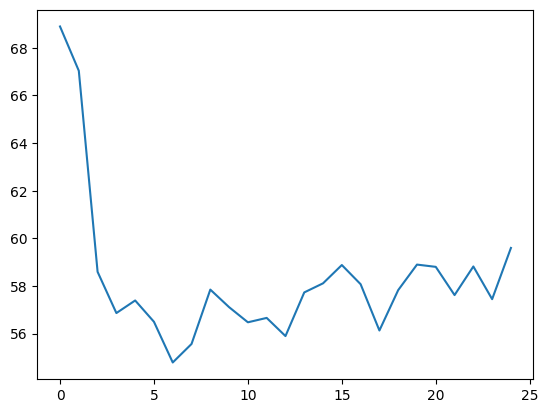

In [3]:
# inspect configuration of a given dfs
NAME = '2023-09-11_12-19-37'

with open(f"../log/debug_{NAME}.log") as input_file:
    head = [next(input_file) for _ in range(25)]
print(''.join(head))

df_inspecting = pd.read_csv(f"../dfs/{NAME}.csv")
print("SFE TIME STATISTICS")
print(df_inspecting['sfe_time'].describe())
(df_inspecting['timings.total'] / 1000).plot()

In [4]:
# add good data to appropriate sets

sets['2xL_112_OT_64bit_Wired'].add('2023-08-20_22-02-32')
sets['2xL_112_OT_32bit_Wireless'].add('2023-09-05_02-58-18')
sets['2xL_112_OT_64bit_Wireless'].add('2023-08-23_14-14-16')
sets['2xL_112_OT_32bit_Wireless'].add('2023-09-03_15-21-22')
sets['2xL_80_OT_32bit_Wired'].add('2023-09-10_16-59-26')
sets['2xL_80_OT_32bit_Wireless'].add('2023-09-10_23-40-22')

sets['2xR_80_OT_64bit_Wired'].add('2023-08-11_17-50-24')
sets['2xR_80_Paillier_64bit_Wired'].add('2023-08-11_18-08-52')
sets['2xR_80_DGK_64bit_Wired'].add('2023-08-11_18-27-31')
sets['2xR_112_OT_64bit_Wired'].add('2023-08-11_18-46-04')
sets['2xR_112_Paillier_64bit_Wired'].add('2023-08-11_19-05-19')
sets['2xR_112_DGK_64bit_Wired'].add('2023-08-11_19-25-15')
sets['2xR_128_OT_64bit_Wired'].add('2023-08-11_19-44-36')
sets['2xR_128_Paillier_64bit_Wired'].add('2023-08-12_15-22-06')
sets['2xR_128_DGK_64bit_Wired'].add('2023-08-12_16-45-07')

sets['2xR_80_OT_64bit_Wireless'].add('2023-08-12_00-45-56')
sets['2xR_80_Paillier_64bit_Wireless'].add('2023-08-12_01-14-04')
sets['2xR_80_DGK_64bit_Wireless'].add('2023-08-12_01-41-54')
sets['2xR_112_OT_64bit_Wireless'].add('2023-08-12_12-58-09')
sets['2xR_112_Paillier_64bit_Wireless'].add('2023-08-12_14-00-23')
sets['2xR_112_DGK_64bit_Wireless'].add('2023-08-12_09-56-48')
sets['2xR_128_OT_64bit_Wireless'].add('2023-08-12_10-27-23')
sets['2xR_128_Paillier_64bit_Wireless'].add('2023-08-12_11-00-42')
sets['2xR_128_DGK_64bit_Wireless'].add('2023-08-12_11-40-56')

sets['2xL_80_OT_32bit_Wired'].add('2023-09-09_17-33-46')
sets['2xL_80_OT_32bit_Wireless'].add('2023-09-11_10-47-32')
sets['2xL_80_OT_32bit_Wireless'].add('2023-09-11_12-19-37')


In [5]:
# create dfs from the gathered csvs

dfs = {}
for k in sets.keys():
    if not sets[k]:
        continue
    dfs[k] = pd.concat((pd.read_csv(f"../dfs/{f}.csv") for f in sets[k]), ignore_index=True)

In [6]:
# print how many tests for each config
tot = 0
for k in dfs:
    print(f"{k}: {len(dfs[k])}")
    tot+=len(dfs[k])
print(f"total: {tot}")

2xL_80_OT_32bit_Wireless: 566
2xL_80_OT_32bit_Wired: 526
2xL_112_OT_64bit_Wireless: 738
2xL_112_OT_64bit_Wired: 1718
2xL_112_OT_32bit_Wireless: 86
2xR_80_OT_64bit_Wireless: 16
2xR_80_OT_64bit_Wired: 16
2xR_80_Paillier_64bit_Wireless: 16
2xR_80_Paillier_64bit_Wired: 16
2xR_80_DGK_64bit_Wireless: 16
2xR_80_DGK_64bit_Wired: 16
2xR_112_OT_64bit_Wireless: 16
2xR_112_OT_64bit_Wired: 16
2xR_112_Paillier_64bit_Wireless: 16
2xR_112_Paillier_64bit_Wired: 16
2xR_112_DGK_64bit_Wireless: 16
2xR_112_DGK_64bit_Wired: 16
2xR_128_OT_64bit_Wireless: 16
2xR_128_OT_64bit_Wired: 16
2xR_128_Paillier_64bit_Wireless: 16
2xR_128_Paillier_64bit_Wired: 6
2xR_128_DGK_64bit_Wireless: 16
2xR_128_DGK_64bit_Wired: 16
total: 3912


In [7]:
# dave the dataframes

for k in dfs:
    dfs[k].to_csv(f"{k}.csv")